In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation
from sklearn.semi_supervised import LabelSpreading
import pandas as pd

rng = np.random.RandomState(0)

In [2]:
metro_data = pd.read_csv('metro_summary_data.csv')
sorted_metro_data = metro_data.sort_values('PercentTech', ascending=False)

In [3]:
sorted_metro_data['LogMedianRent'] = np.log(sorted_metro_data['MedianRent'])
sorted_metro_data['LogMedianHouseValue'] = np.log(sorted_metro_data['MedianHouseValue'])
sorted_metro_data['LogTotalPeople'] = np.log(sorted_metro_data['TotalPeople'])

In [4]:
df2 = pd.DataFrame(sorted_metro_data[['CBSA', 'TotalPeople', 'TotalTech', 'PercentTech']])
df2.rename(columns={'CBSA': 'Metro Area', 'TotalPeople': 'Population',
                   'TotalTech': 'Tech industry pop.', 'PercentTech': '% tech industry'},
           inplace=True)
df2

,Metro Area,Population,Tech industry pop.,% tech industry
204,"San Jose-Sunnyvale-Santa Clara, CA",1916862,114373,5.966679
131,"Madison, WI",523793,20891,3.988408
26,"Bloomington, IL",173828,6648,3.824470
17,"Austin-Round Rock, TX",1881313,68831,3.658668
185,"Raleigh, NC",1209514,42795,3.538198
203,"San Francisco-Oakland-Hayward, CA",4656199,164574,3.534514
211,"Seattle-Tacoma-Bellevue, WA",3735393,126339,3.382214
230,"Trenton, NJ",370588,12258,3.307716
239,"Washington-Arlington-Alexandria, DC-VA-MD-WV",3780523,121278,3.207969
36,"Cedar Rapids, IA",220052,6407,2.911585


In [5]:
array2 = sorted_metro_data.as_matrix(['PercentCollege', 'PercentFemale'])

test_labels = [-1, -1, -1, 1, 1, 1, 1, 1, 1]
rng.shuffle(test_labels)

end_labels = [-1] * (array2.shape[0] - 15) + [0] * 6
rng.shuffle(end_labels)


labels2 = np.asarray(test_labels + end_labels)

prop2 = label_propagation.LabelPropagation(kernel='knn', n_neighbors=7, max_iter=100, alpha=1).fit(array2, labels2)
model_results = prop2.predict(array2)
#np.where(np.asarray(prop2[1]) > 0)
model_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
indices = np.where(np.asarray(model_results) > 0)
sorted_metro_data.iloc[indices]['CBSA']

Series([], Name: CBSA, dtype: object)

In [7]:
sorted_metro_data.head()

,Unnamed: 0,CBSA,TotalPeople,TotalTech,MedianAge,PercentHighSchool,PercentCollege,PercentPostGrad,MedianIncome,PercentFemale,PercentBornOutOfState,PercentImmigrant,Percent18to35,PercentTech,MedianRent,MedianHouseValue,DiversityIndex,LogMedianRent,LogMedianHouseValue,LogTotalPeople
204,205,"San Jose-Sunnyvale-Santa Clara, CA",1916862,114373,37.0,0.677346,0.353995,0.160663,30000.0,0.496868,0.546244,0.400493,0.255370,5.966679,1800.0,800000.0,0.701149,7.495542,13.592367,14.466200
131,132,"Madison, WI",523793,20891,35.0,0.757956,0.369048,0.129826,30000.0,0.502044,0.409666,0.104973,0.299702,3.988408,850.0,230000.0,0.344415,6.745236,12.345835,13.168852
26,27,"Bloomington, IL",173828,6648,33.0,0.747929,0.292554,0.098655,25000.0,0.511373,0.257571,0.059944,0.325857,3.824470,700.0,165000.0,0.347239,6.551080,12.013701,12.065822
17,18,"Austin-Round Rock, TX",1881313,68831,34.0,0.684594,0.302374,0.101011,27200.0,0.499367,0.466017,0.170215,0.293115,3.658668,950.0,240000.0,0.609035,6.856462,12.388394,14.447480
185,186,"Raleigh, NC",1209514,42795,36.0,0.678530,0.312101,0.109033,27000.0,0.511799,0.533912,0.136046,0.249252,3.538198,830.0,225000.0,0.565302,6.721426,12.323856,14.005729


In [8]:
sorted_metro_data.index



Int64Index([204, 131,  26,  17, 185, 203, 211, 230, 239,  36,
            ...
            168, 250,  50, 115,  60, 136,  32, 125,  62, 132],
           dtype='int64', length=251)

In [9]:
from sklearn import preprocessing

subset = sorted_metro_data[['PercentCollege',
                  'Percent18to35', 'LogMedianRent', 'DiversityIndex']]
nsmd = pd.DataFrame(
    index = subset.index,
    data = preprocessing.normalize(subset, axis=0),
    columns = subset.columns
)

plt.hist(nsmd.LogMedianRent)


(array([  4.,  28.,  48.,  68.,  50.,  26.,  10.,  10.,   6.,   1.]),
 array([ 0.05748738,  0.05893052,  0.06037367,  0.06181681,  0.06325995,
         0.0647031 ,  0.06614624,  0.06758939,  0.06903253,  0.07047567,
         0.07191882]),
 <a list of 10 Patch objects>)

In [10]:
plt.hist(sorted_metro_data.MedianRent)


(array([ 30.,  77.,  79.,  37.,   8.,  10.,   3.,   6.,   0.,   1.]),
 array([  400.,   540.,   680.,   820.,   960.,  1100.,  1240.,  1380.,
         1520.,  1660.,  1800.]),
 <a list of 10 Patch objects>)

In [11]:
bootstrap_model_results = []
for i in range(0, 1000):
    array2 = nsmd.as_matrix(['PercentCollege', 'Percent18to35'])
    #array2 = nsmd
    
    test_labels = [-1, -1, -1, 1, 1, 1, 1, 1, 1]
    rng.shuffle(test_labels)

    end_labels = [-1] * (array2.shape[0] - 15) + [0] * 6
    rng.shuffle(end_labels)


    labels2 = np.asarray(test_labels + end_labels)

    prop2 = label_propagation.LabelPropagation(kernel='knn', n_neighbors=7, max_iter=100, alpha=1).fit(array2, labels2)
    model_results = prop2.predict(array2)
    #np.where(np.asarray(prop2[1]) > 0)
    bootstrap_model_results.append(model_results)

probabilities = np.array([0 for x in range(0, len(bootstrap_model_results[1]))])
for vec in bootstrap_model_results:
    probabilities = np.add(vec / 1000, probabilities)
probabilities
    

array([ 0.677,  0.647,  0.604,  0.7  ,  0.762,  0.677,  0.782,  0.793,
        0.658,  0.   ,  0.778,  0.   ,  0.537,  0.534,  0.565,  0.016,
        0.646,  0.793,  0.531,  0.612,  0.506,  0.647,  0.531,  0.788,
        0.793,  0.787,  0.787,  0.789,  0.   ,  0.782,  0.089,  0.   ,
        0.003,  0.538,  0.003,  0.793,  0.52 ,  0.   ,  0.793,  0.72 ,
        0.532,  0.76 ,  0.   ,  0.532,  0.   ,  0.791,  0.   ,  0.   ,
        0.79 ,  0.793,  0.019,  0.   ,  0.684,  0.   ,  0.003,  0.722,
        0.   ,  0.53 ,  0.   ,  0.   ,  0.793,  0.   ,  0.   ,  0.787,
        0.79 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.002,  0.   ,
        0.628,  0.   ,  0.   ,  0.527,  0.683,  0.791,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.003,  0.   ,  0.   ,  0.   ,
        0.196,  0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.526,
        0.   ,  0.532,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
      

In [12]:
plt.hist(probabilities, bins=25)

(array([ 192.,    1.,    1.,    0.,    1.,    0.,    1.,    0.,    1.,
           0.,    0.,    0.,    1.,    0.,    0.,    1.,   12.,    1.,
           1.,    4.,    4.,    4.,    3.,    1.,   22.]),
 array([ 0.     ,  0.03172,  0.06344,  0.09516,  0.12688,  0.1586 ,
         0.19032,  0.22204,  0.25376,  0.28548,  0.3172 ,  0.34892,
         0.38064,  0.41236,  0.44408,  0.4758 ,  0.50752,  0.53924,
         0.57096,  0.60268,  0.6344 ,  0.66612,  0.69784,  0.72956,
         0.76128,  0.793  ]),
 <a list of 25 Patch objects>)

In [13]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

#similarities2 = euclidean_distances(nsmd)
similarities2 = euclidean_distances(array2)

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities2).embedding_
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities2, init=pos)

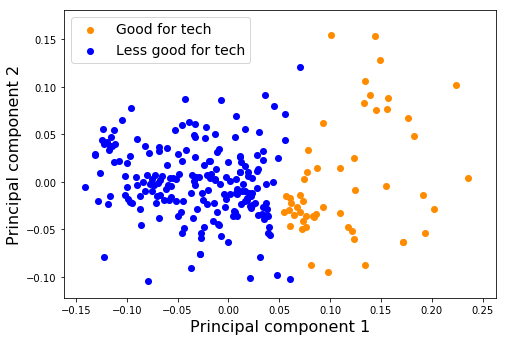

In [14]:
%matplotlib inline
# Rescale the data
pos *= np.sqrt((array2 ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((array2 ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
array2 = clf.fit_transform(array2)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
ax.set_xlabel('Principal component 1', fontsize=16)
ax.set_ylabel('Principal component 2', fontsize=16)


s = 50
plt.scatter(npos[np.where(np.asarray(probabilities) >= .5), 0], npos[np.where(np.asarray(probabilities) >= .5), 1], color='darkorange', s=s, lw=0, label='Good for tech')
plt.scatter(npos[np.where(np.asarray(probabilities) < .5), 0], npos[np.where(np.asarray(probabilities) < .5), 1], color='blue', s=s, lw=0, label='Less good for tech')

plt.legend(scatterpoints=1, loc='best', shadow=False, fontsize=14)

In [15]:
indices = np.where(np.asarray(probabilities) >= 0.5)
#sorted_metro_data.iloc[indices]['CBSA']

indices

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  29,
         33,  35,  36,  38,  39,  40,  41,  43,  45,  48,  49,  52,  55,
         57,  60,  63,  64,  72,  75,  76,  77,  95,  97, 126, 143, 152, 162]),)

In [16]:
indices = np.where(np.asarray(probabilities) >= 0.5)
good_for_tech = sorted_metro_data.iloc[indices]

In [17]:
similarity_matrix = euclidean_distances(nsmd)

sorted_metro_data['GoodForTech'] = np.where(np.asarray(probabilities) >= 0.5, 'Yes', 'No')

In [18]:
import pymysql.cursors

user = 'kkutchko'
passwd = 'password'
database = 'metro_areas'

connection = pymysql.connect(host='localhost',
    user=user,
    password=passwd,
    db=database,
    cursorclass=pymysql.cursors.DictCursor)

drop_table_cmd = "drop table if exists metro_data"
drop_table_cmd2 = "drop table if exists city_distance"

create_table_cmd = "create table if not exists metro_data (" +\
    "CBSA varchar(64), " +\
    "TotalPeople int(8), " +\
    "PercentCollege decimal(7, 4), " +\
    "Percent18to35 decimal(7, 4), " +\
    "MedianRent int(5), " +\
    "DiversityIndex decimal(5, 4), " +\
    "GoodForTech varchar(5), " +\
    "primary key (CBSA))"
    
create_table_cmd2 = "create table if not exists city_distance (" +\
    "CBSA1 varchar(64), " +\
    "CBSA2 varchar(64), " +\
    "distance decimal(11, 8), " +\
    "primary key (CBSA1, CBSA2))"

insert_cmd = "insert into metro_data " +\
    "(CBSA, TotalPeople, PercentCollege, Percent18to35, MedianRent, DiversityIndex, GoodForTech) " +\
    'values (%s, %s, %s, %s, %s, %s, %s) ' +\
    "on duplicate key update CBSA = CBSA"
    
insert_cmd2 = "insert into city_distance " +\
    "(CBSA1, CBSA2, distance) " +\
    'values (%s, %s, %s) ' +\
    'on duplicate key update CBSA1=CBSA1, CBSA2=CBSA2'
    
try:
    with connection.cursor() as cursor:
        # create table with city data
        cursor.execute(drop_table_cmd)
        cursor.execute(create_table_cmd)

        for idx, line in sorted_metro_data.iterrows():
            cursor.execute(insert_cmd, (line['CBSA'], line['TotalPeople'],
                line['PercentCollege'] * 100, line['Percent18to35'] * 100,
                line['MedianRent'], line['DiversityIndex'],
                line['GoodForTech']))
            
        # create table for euclidean distances
        cursor.execute(drop_table_cmd2)
        cursor.execute(create_table_cmd2)
        
        for x in range(0, len(similarity_matrix)):
            for y in range(0, len(similarity_matrix[x])):
                matrix_data = (sorted_metro_data['CBSA'].iloc[x],
                     sorted_metro_data['CBSA'].iloc[y],
                     float(similarity_matrix[x][y]))
                if matrix_data[0] != matrix_data[1]:
                    cursor.execute(insert_cmd2, matrix_data)
        
finally:
    connection.commit()
    connection.close()
    



/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1051, "Unknown table 'metro_areas.metro_data'")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'PercentCollege' at row 1")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'Percent18to35' at row 1")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'DiversityIndex' at row 1")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'distance' at row 1")
  self._do_get_result()


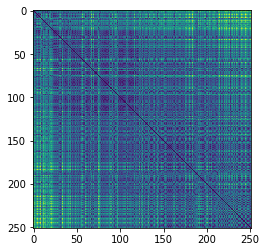

In [19]:
%matplotlib inline
plt.imshow(similarity_matrix)

In [20]:

for x in range(0, len(similarity_matrix)):
    closestCity = None
    for y in range(0, len(similarity_matrix[x])):
        matrix_data = (sorted_metro_data['CBSA'].iloc[x],
             sorted_metro_data['CBSA'].iloc[y],
             float(similarity_matrix[x][y]))
        if (not closestCity or matrix_data[2] < closestCity[1]) and matrix_data[0] != matrix_data[1]:
            closestCity = (matrix_data[1], matrix_data[2])
    print(sorted_metro_data['CBSA'].iloc[x], closestCity)

San Jose-Sunnyvale-Santa Clara, CA ('San Francisco-Oakland-Hayward, CA', 0.0025663447808528953)
Madison, WI ('Fort Collins, CO', 0.014618470697607619)
Bloomington, IL ('Kalamazoo-Portage, MI', 0.010009657972953669)
Austin-Round Rock, TX ('Richmond, VA', 0.009199628264089389)
Raleigh, NC ('Seattle-Tacoma-Bellevue, WA', 0.006898060992718991)
San Francisco-Oakland-Hayward, CA ('San Jose-Sunnyvale-Santa Clara, CA', 0.0025663447808528953)
Seattle-Tacoma-Bellevue, WA ('Raleigh, NC', 0.006898060992718991)
Trenton, NJ ('New York-Newark-Jersey City, NY-NJ-PA', 0.00479024423930452)
Washington-Arlington-Alexandria, DC-VA-MD-WV ('San Francisco-Oakland-Hayward, CA', 0.006087934193301144)
Cedar Rapids, IA ('Appleton, WI', 0.001489723464916288)
Minneapolis-St. Paul-Bloomington, MN-WI ('Portland-Vancouver-Hillsboro, OR-WA', 0.008801065302187688)
Provo-Orem, UT ('Waterloo-Cedar Falls, IA', 0.005158322200458836)
Ithaca, NY ('Lawrence, KS', 0.01766336766780417)
Tallahassee, FL ('Gainesville, FL', 0.00381

Buffalo-Cheektowaga-Niagara Falls, NY ('Cincinnati, OH-KY-IN', 0.004150342212002443)
Green Bay, WI ('Peoria, IL', 0.004293940607413277)
Vallejo-Fairfield, CA ('Houston-The Woodlands-Sugar Land, TX', 0.009636435564843419)
Hagerstown-Martinsburg, MD-WV ('Michigan City-La Porte, IN', 0.005368952703528539)
Anchorage, AK ('Santa Maria-Santa Barbara, CA', 0.006505370719440333)
Urban Honolulu, HI ('Los Angeles-Long Beach-Anaheim, CA', 0.003129279326220253)
Bend-Redmond, OR ('Torrington, CT', 0.009347945377657405)
Fort Wayne, IN ('South Bend-Mishawaka, IN-MI', 0.0035691960838618825)
Lubbock, TX ('Greenville, NC', 0.006229010064424339)
Spokane-Spokane Valley, WA ('Whitewater-Elkhorn, WI', 0.006753707879571027)
Janesville-Beloit, WI ('St. George, UT', 0.00529724582352187)
Eugene, OR ('Spokane-Spokane Valley, WA', 0.007303333256706653)
Miami-Fort Lauderdale-West Palm Beach, FL ('Atlanta-Sandy Springs-Roswell, GA', 0.007181303702455007)
Niles-Benton Harbor, MI ('Davenport-Moline-Rock Island, IA-IL

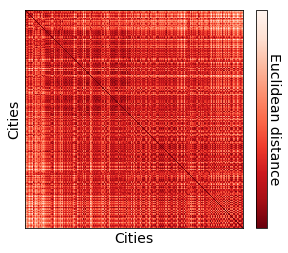

In [21]:
from matplotlib import cm as cm
from matplotlib import rcParams as rcParams

cmap = cm.get_cmap('Reds_r')

fig, ax = plt.subplots()
cax = ax.matshow(similarity_matrix * 100, interpolation='nearest')
ax.grid(False)

cax = ax.matshow(similarity_matrix * 100, interpolation='nearest', cmap=cmap)
clb = fig.colorbar(cax, ticks=[], fraction=0.046, pad=0.04)
ax.set_xlabel('Cities', fontsize=14)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Cities', fontsize=14)
ax.get_yaxis().set_ticks([])
clb.set_label('Euclidean distance', rotation=270, labelpad=14, fontsize=14)
